In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from DataFields import DataFields
from DataFields import DateReportedFields


In [2]:
df = pd.read_csv("diagnosed_processed.csv")
df.head(20)

,Birth Year,Sex,Education,Primary Hypertension,Secondary Hypertension,BMI Impedance,Smoking Status,Ever Smoked,Alcohol Intake Frequency,Report of stroke,...,Platelet distribution width,Red blood cell (erythrocyte) count,Red blood cell (erythrocyte) distribution width,Reticulocyte count,Reticulocyte percentage,White blood cell (leukocyte) count,Blood Pressure Diastolic,Blood Pressure Systolic,Pulse Rate at Blood Pressure,Vascular Dementia Report Date
0,1940.0,1,3.0,2009-08-13,NaN,27.0801,1.0,1.0,2.0,NaN,...,16.40,4.799,13.07,0.050,1.047,7.79,75.0,182.0,62.0,2019-09-06
1,1938.0,1,0.0,2000-10-01,NaN,33.7984,1.0,1.0,2.0,NaN,...,17.10,4.080,15.80,0.134,3.280,3.60,84.0,146.0,73.0,2022-07-01
2,1941.0,0,3.0,NaN,NaN,30.3880,0.0,0.0,6.0,NaN,...,16.20,4.330,15.00,0.058,1.330,6.00,94.0,143.0,87.0,2022-09-01
3,1938.0,1,0.0,2004-01-01,NaN,32.2385,1.0,1.0,5.0,NaN,...,16.10,4.800,15.50,0.084,1.750,8.20,77.0,141.0,79.0,2021-02-04
4,1947.0,0,0.0,NaN,NaN,32.0399,0.0,0.0,2.0,NaN,...,16.30,4.440,13.40,0.042,0.950,7.10,71.0,131.0,55.0,2019-04-11
5,1947.0,0,3.0,NaN,NaN,22.2527,0.0,0.0,2.0,NaN,...,17.42,4.155,13.96,0.019,0.465,3.87,69.0,136.0,74.0,2022-10-21
6,1939.0,0,0.0,1996-10-01,NaN,31.1199,0.0,0.0,2.0,NaN,...,15.80,3.840,14.40,0.033,0.860,5.20,98.0,151.0,78.0,2022-07-14
7,1946.0,1,0.0,2013-07-19,NaN,19.6282,2.0,1.0,3.0,NaN,...,17.04,4.948,14.34,0.025,0.502,4.53,78.0,131.0,64.0,2021-06-07
8,1942.0,1,0.0,2001-03-01,NaN,38.4615,2.0,1.0,2.0,NaN,...,16.71,4.861,14.49,0.084,1.732,11.86,78.0,101.0,99.0,2020-12-09
9,1954.0,1,1.0,NaN,NaN,21.7900,2.0,1.0,1.0,NaN,...,16.44,4.805,14.03,0.055,1.138,5.93,63.0,129.0,71.0,2021-07-29


In [3]:
# Converts fields from date to distance in years as a float to target_field
def convert_time_distance(df, date_features: list, target_feature: str) -> pd.DataFrame:
    for feature in date_features:
        df[feature] = pd.to_datetime(df[feature], errors='coerce')
        df[target_feature] = pd.to_datetime(df[target_feature], errors='coerce')
        delta_years = (df[target_feature] - df[feature]).dt.days / 365.25
        df[feature] = delta_years
    return df
    

In [4]:


def plot_feature_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

df = convert_time_distance(df, DateReportedFields, "Vascular Dementia Report Date")

df.to_csv('test.csv', index=False)

df.head(20)

,Birth Year,Sex,Education,Primary Hypertension,Secondary Hypertension,BMI Impedance,Smoking Status,Ever Smoked,Alcohol Intake Frequency,Report of stroke,...,Platelet distribution width,Red blood cell (erythrocyte) count,Red blood cell (erythrocyte) distribution width,Reticulocyte count,Reticulocyte percentage,White blood cell (leukocyte) count,Blood Pressure Diastolic,Blood Pressure Systolic,Pulse Rate at Blood Pressure,Vascular Dementia Report Date
0,1940.0,1,3.0,10.064339,NaN,27.0801,1.0,1.0,2.0,NaN,...,16.40,4.799,13.07,0.050,1.047,7.79,75.0,182.0,62.0,2019-09-06
1,1938.0,1,0.0,21.746749,NaN,33.7984,1.0,1.0,2.0,NaN,...,17.10,4.080,15.80,0.134,3.280,3.60,84.0,146.0,73.0,2022-07-01
2,1941.0,0,3.0,NaN,NaN,30.3880,0.0,0.0,6.0,NaN,...,16.20,4.330,15.00,0.058,1.330,6.00,94.0,143.0,87.0,2022-09-01
3,1938.0,1,0.0,17.095140,NaN,32.2385,1.0,1.0,5.0,NaN,...,16.10,4.800,15.50,0.084,1.750,8.20,77.0,141.0,79.0,2021-02-04
4,1947.0,0,0.0,NaN,NaN,32.0399,0.0,0.0,2.0,NaN,...,16.30,4.440,13.40,0.042,0.950,7.10,71.0,131.0,55.0,2019-04-11
5,1947.0,0,3.0,NaN,NaN,22.2527,0.0,0.0,2.0,NaN,...,17.42,4.155,13.96,0.019,0.465,3.87,69.0,136.0,74.0,2022-10-21
6,1939.0,0,0.0,25.782341,NaN,31.1199,0.0,0.0,2.0,NaN,...,15.80,3.840,14.40,0.033,0.860,5.20,98.0,151.0,78.0,2022-07-14
7,1946.0,1,0.0,7.885010,NaN,19.6282,2.0,1.0,3.0,NaN,...,17.04,4.948,14.34,0.025,0.502,4.53,78.0,131.0,64.0,2021-06-07
8,1942.0,1,0.0,19.775496,NaN,38.4615,2.0,1.0,2.0,NaN,...,16.71,4.861,14.49,0.084,1.732,11.86,78.0,101.0,99.0,2020-12-09
9,1954.0,1,1.0,NaN,NaN,21.7900,2.0,1.0,1.0,NaN,...,16.44,4.805,14.03,0.055,1.138,5.93,63.0,129.0,71.0,2021-07-29


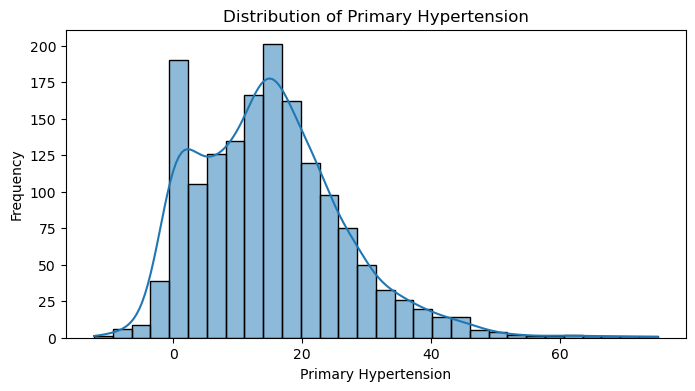

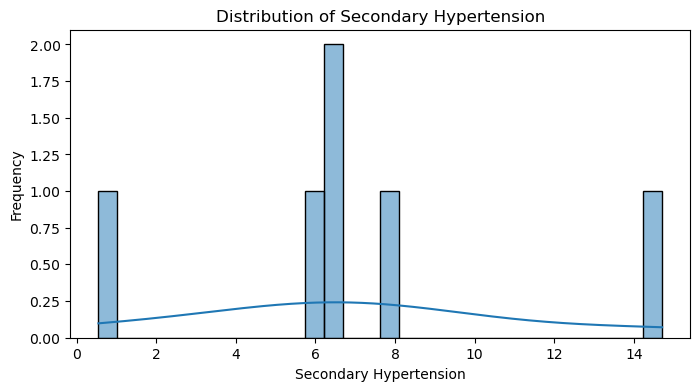

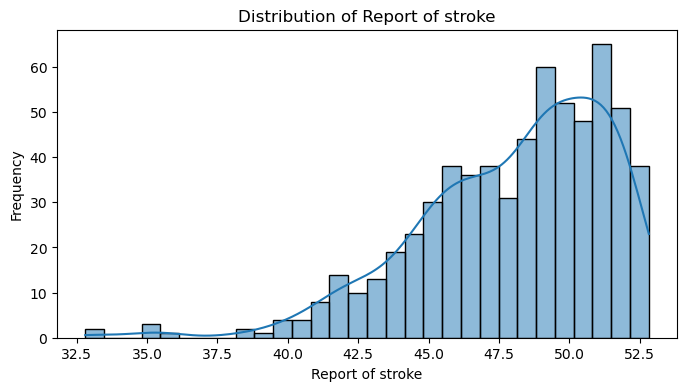

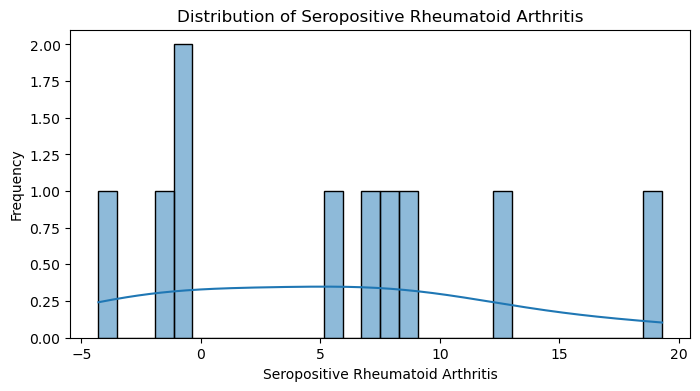

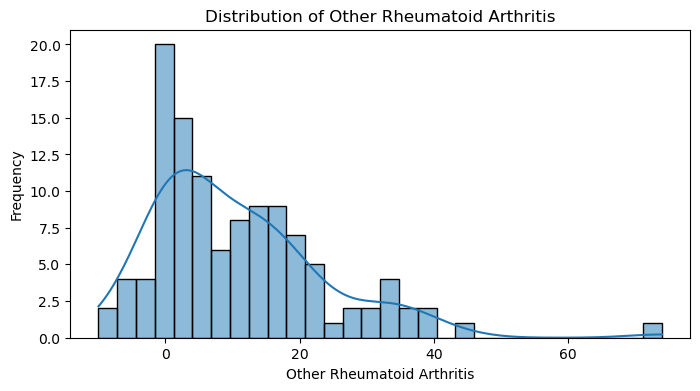

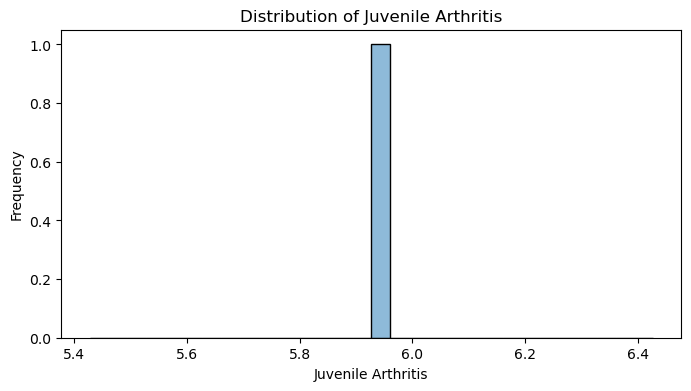

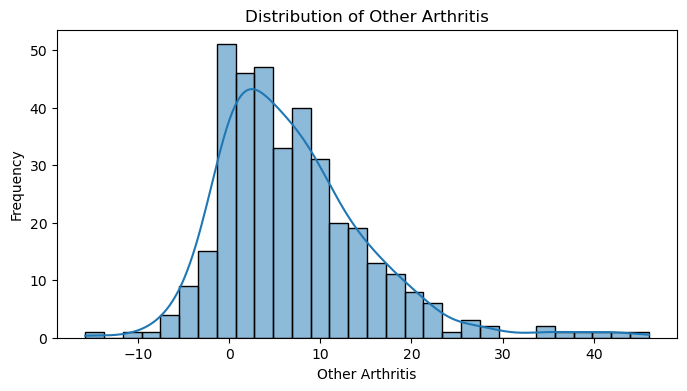

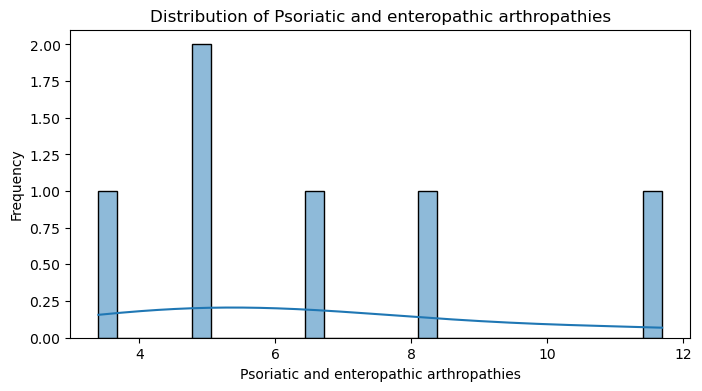

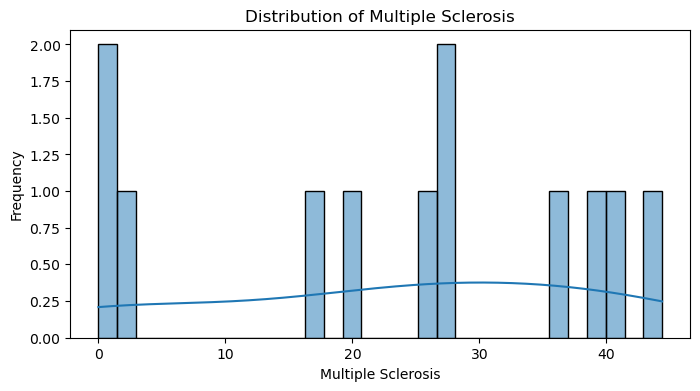

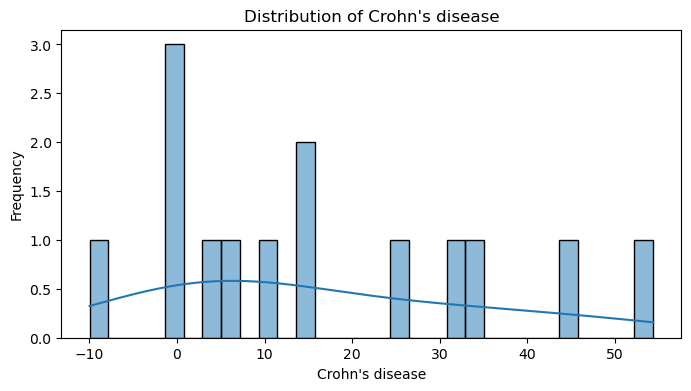

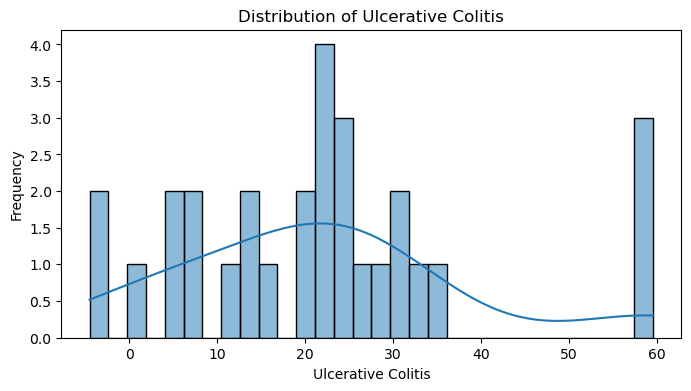

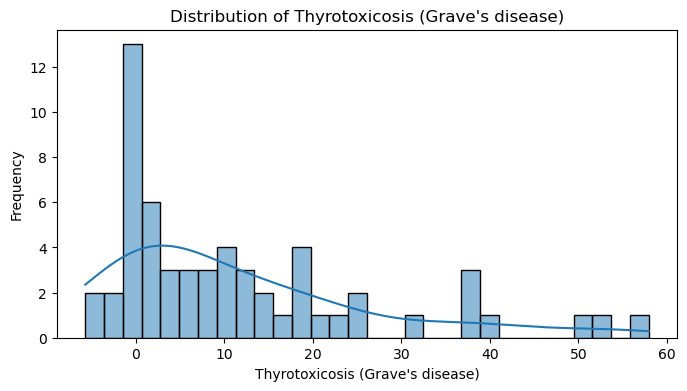

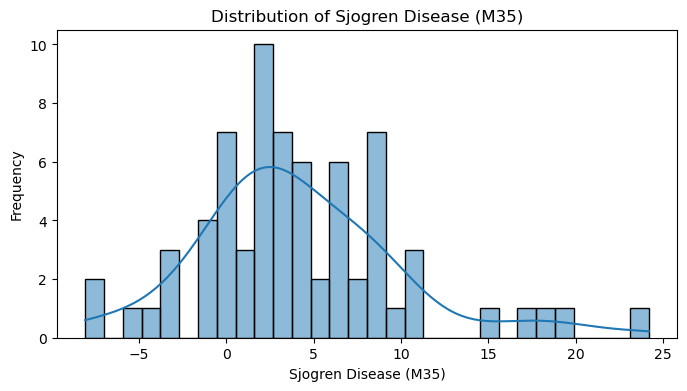

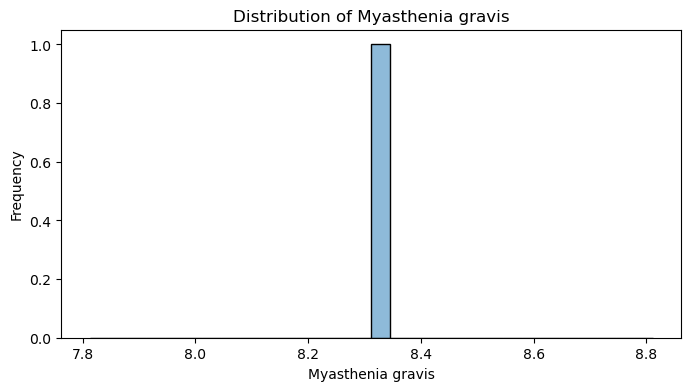

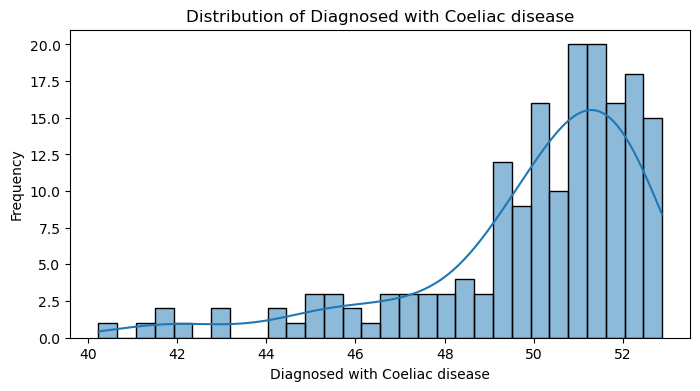

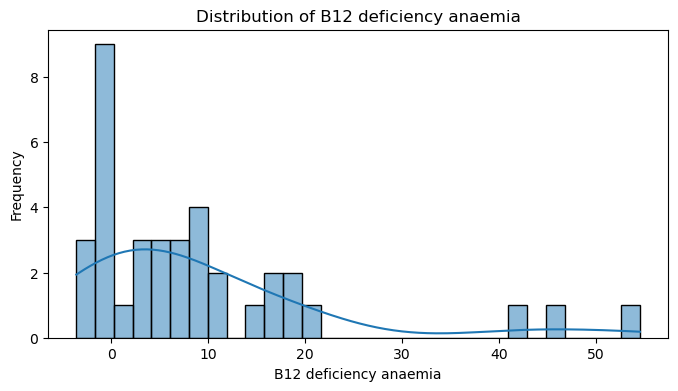

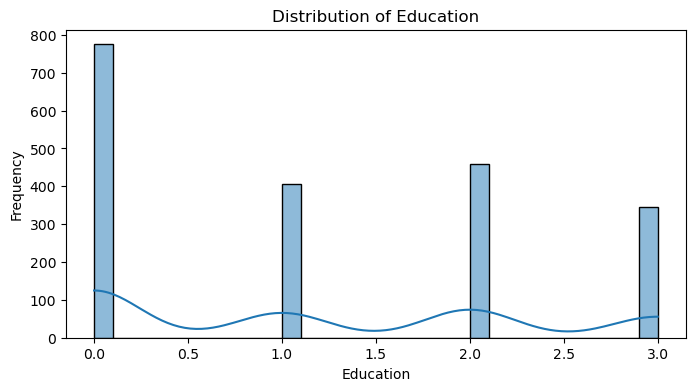

In [5]:
fields = DateReportedFields.copy()
fields.extend(["Education"])

plot_feature_distribution(df, fields)